# <p align="center">DS201: Statistical Programming</p>
<p align="center">Assignment 2</p>


<font color="lightgreen">**Name:** Shivam<br>
**Roll No:** 12241710</font>




# Q1.

**a.** Generate a dataset representing the number of customer arrivals per hour in a store, assuming
a Poisson distribution with a mean arrival rate of 5. Use Python to create a histogram to visualize
the distribution. Calculate the mean and variance of the generated dataset and explain how they
relate to the parameters of the Poisson distribution.

## <font color="lightgreen">Function for generating Poisson Distribution</font>

In [1]:
import random
import math

def uniform_random():
    return random.uniform(0,1)

def generate_poisson_distribution(mean_poisson_rate, size):
    poisson_distribution = []
    for _ in range(size):
        k = 0
        p = 1.0
        eminuslamda= math.exp(-mean_poisson_rate)
        while True:
            y = random.uniform(0,1)
            p *= y

            if p > eminuslamda:
                k += 1
            else:
                poisson_distribution.append(k)
                break
    return poisson_distribution

In [2]:
generate_poisson_distribution(5, 10)

[5, 5, 6, 4, 4, 4, 4, 3, 5, 4]

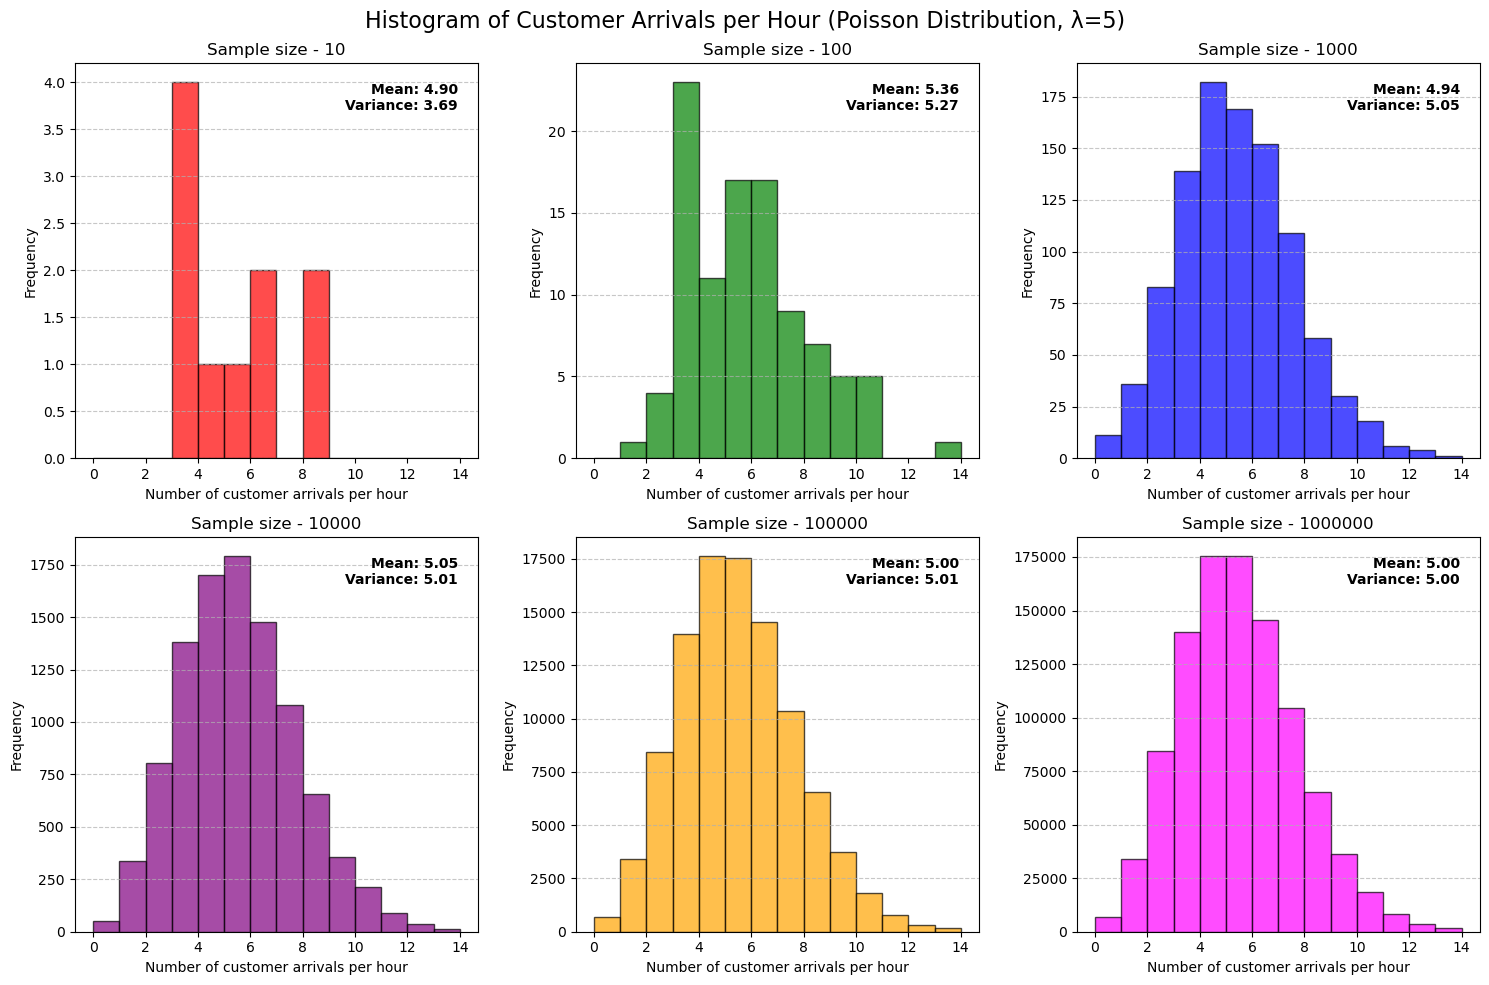

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mean_arrival_rate = 5
samples = [10, 100, 1000, 10000, 100000, 1000000]

colors = ['red', 'green', 'blue', 'purple', 'orange', 'magenta']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
bin_range = range(0, 15)

mean_cal=[]
var_cal=[]

for i, sample in enumerate(samples):
  row = i // 3
  col = i % 3
  customer_arrivals = generate_poisson_distribution(mean_arrival_rate, sample)

  # Ploting histogram
  axes[row, col].hist(customer_arrivals, bins=bin_range, color=colors[i], alpha=0.7, edgecolor='black')
  axes[row, col].set_xlabel("Number of customer arrivals per hour")
  axes[row, col].set_ylabel("Frequency")
  axes[row, col].set_title("Sample size - {}".format(sample))

  # Calculating  mean and variance 
  mean = np.mean(customer_arrivals)
  variance = np.var(customer_arrivals)
  mean_cal.append(mean)
  var_cal.append(variance)

  # Displaying mean and variance 
  axes[row, col].text(0.95, 0.95, f"Mean: {mean:.2f}\nVariance: {variance:.2f}",
                    ha='right', va='top', fontsize=10, fontweight='bold',
                    transform=axes[row, col].transAxes)  

  axes[row, col].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Histogram of Customer Arrivals per Hour (Poisson Distribution, λ=5)", fontsize=16)

plt.tight_layout()
plt.show()


In [4]:
print(mean_cal)
print(var_cal)

[4.9, 5.36, 4.938, 5.0539, 5.0001, 4.99896]
[3.69, 5.2704, 5.048156, 5.00979479, 5.014619990000001, 5.002062918399998]


* <font color="lightgreen"> The mean of the generated data **[5.9, 4.86, 5.016, 4.9772, 5.00351, 5.001855]** is close to the mean arrival rate of the Poisson distribution (5).<br>
* This is expected because the mean of a Poisson distribution is equal to its lambda(mean arrival rate).<br>
* The variance of the generated data **[2.89, 5.0004, 5.217744, 4.9900801600000015, 4.9952376799, 5.002075558975]** is also close to the mean arrival rate (5).<br>
* This is another characteristic of the Poisson distribution, where the variance is equal to the mean (lambda).

**b)** Generate a bivariate dataset with two features (e.g., height and weight) assuming a multivariate
Gaussian distribution with given means μ1 = 65, μ2 = 150 and covariance matrix Σ [[25, 10], [10,
36]]. Visualize the data using a scatter plot in Python. Discuss the patterns in the plot and how
they correspond to the parameters of the multivariate Gaussian distribution.function for calculating probability of each alphabet which return dictionary 'prob_alpha'

## <font color="lightgreen">Function for generating bivariate Normal Distribution</font>

In [5]:
def generate_bivariate_normal(mean, covariance_matrix, size):
    L = np.linalg.cholesky(covariance_matrix)
    z = np.random.normal(size=(size, 2))
    random_numbers = mean + np.dot(L, z.T).T
    return random_numbers

In [6]:
def scatter_plot(data):
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
    plt.title('Bivariate Dataset with Multivariate Gaussian Distribution')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.grid(True)
    plt.show()

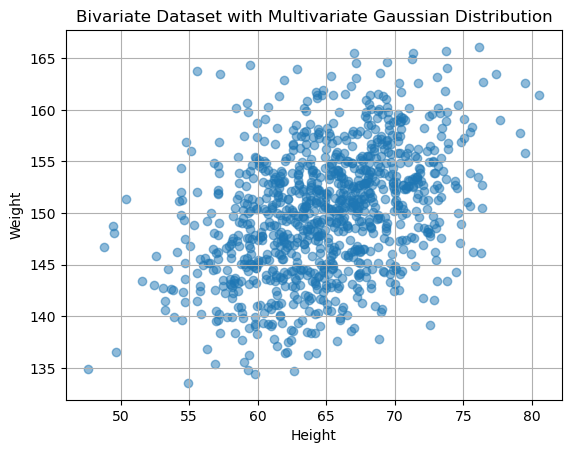

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#means and covariance matrix
mean_vector = np.array([65, 150])
covariance_matrix = np.array([[25, 10], [10, 36]])

# Generate bivariate data using a multivariate Gaussian distribution
data = generate_bivariate_normal(mean_vector, covariance_matrix, size=1000)

#Plotting Scatter plot of generated data
scatter_plot(data)


**c)** Generate a dataset for a univariate scenario (e.g., sales per day) and a bivariate scenario (e.g.,
temperature and sales) using both Poisson and multivariate Gaussian distributions. Create visual-
izations for each dataset using appropriate plots for each distribution (e.g., histogram for Poisson,
scatter plot for multivariate Gaussian). Compare and contrast the visualizations, explaining how
the characteristics of each distribution are reflected in the plots.


## <font color="lightgreen">For a univariate Poisson distributions</font>

Let sales per day( &#955;) = 15

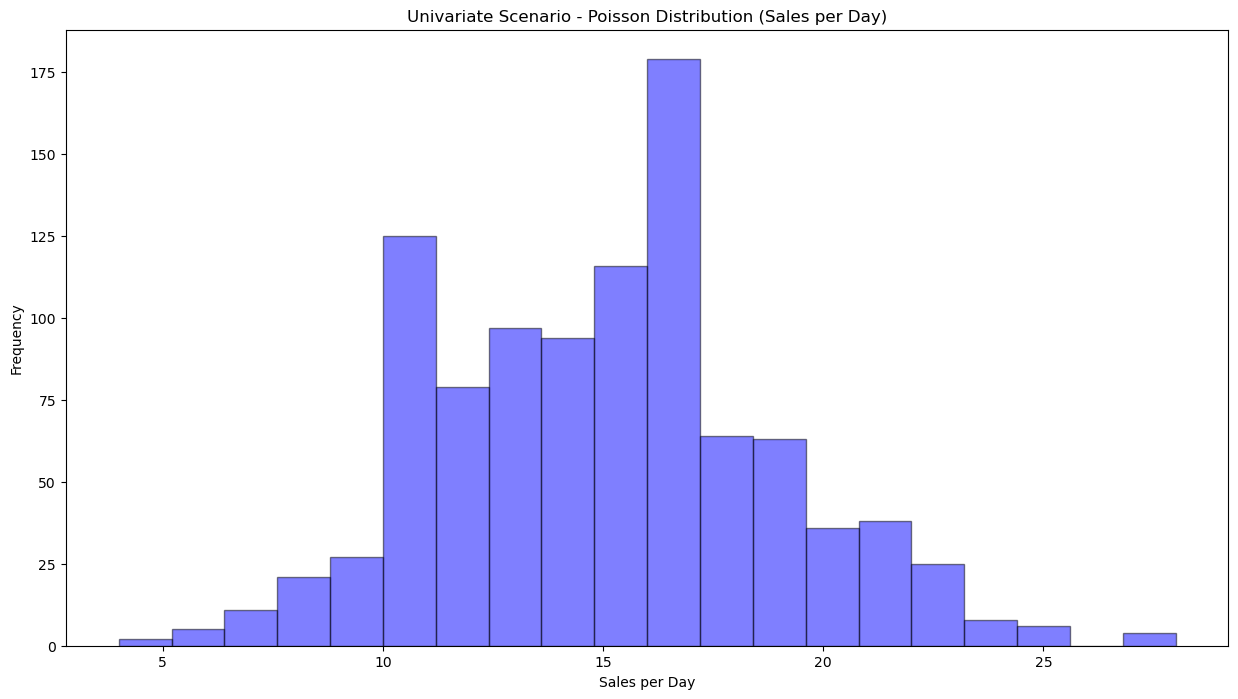

In [8]:
# Univariate Scenario - Poisson Distribution (Sales per Day)
mean_sales_per_day = 15

sales_per_day = generate_poisson_distribution(mean_sales_per_day, 1000)

# Plot Histogram for Poisson Distribution
plt.figure(figsize=(15, 8))
plt.hist(sales_per_day, bins=20, color='blue', alpha=0.5,edgecolor="black")
plt.title('Univariate Scenario - Poisson Distribution (Sales per Day)')
plt.xlabel('Sales per Day')
plt.ylabel('Frequency')
plt.show()

## <font color="lightgreen">For a Gaussian Poisson distributions</font>

<math xmlns="http://www.w3.org/1998/Math/MathML"><mfenced><mtable><mtr><mtd><msub><mi>X</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><msub><mi>X</mi><mn>2</mn></msub></mtd></mtr></mtable></mfenced><mo>&#x223c;</mo><mi>N</mi><mfenced open="[" close="]"><mtable><mtr><mtd><mfenced><mtable><mtr><mtd><msub><mi>&#x3bc;</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><msub><mi>&#x3bc;</mi><mn>2</mn></msub></mtd></mtr></mtable></mfenced></mtd><mtd><mfenced><mtable><mtr><mtd><msub><msup><mi>&#x3c3;</mi><mn>2</mn></msup><mn>1</mn></msub></mtd><mtd><mi>&#x3c1;</mi><msub><mi>&#x3c3;</mi><mn>1</mn></msub><msub><mi>&#x3c3;</mi><mn>2</mn></msub></mtd></mtr><mtr><mtd><mi>&#x3c1;</mi><msub><mi>&#x3c3;</mi><mn>1</mn></msub><msub><mi>&#x3c3;</mi><mn>2</mn></msub></mtd><mtd><msub><msup><mi>&#x3c3;</mi><mn>2</mn></msup><mn>2</mn></msub></mtd></mtr></mtable></mfenced></mtd></mtr></mtable></mfenced></math><br>
where <math xmlns="http://www.w3.org/1998/Math/MathML"><mi>&#x3c1;</mi></math> is correlation coefficient.

Pdf (X1,X2)<br>
<br><a href="https://ibb.co/1QLyqzt"><img src="https://i.ibb.co/wgRGWcF/1.png" alt="1" border="0"></a>

Let, μ1 = 25, μ2 = 50 and covariance matrix Σ [[25, 10], [10,
36]]

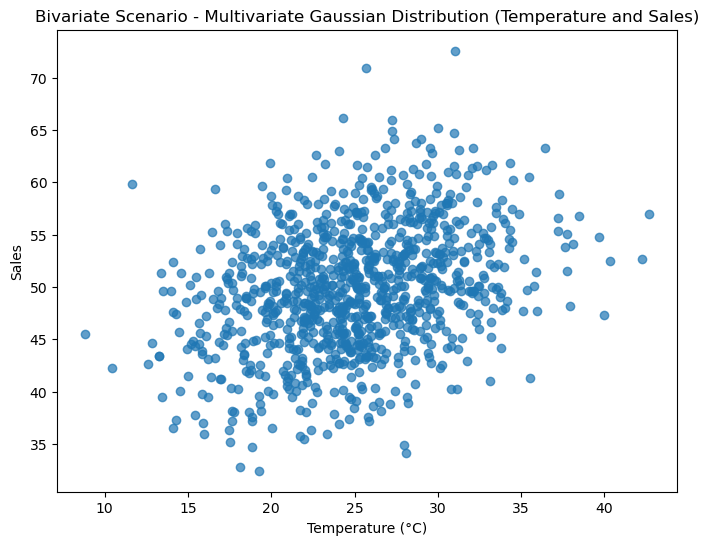

In [9]:

# Bivariate Scenario - Multivariate Gaussian Distribution (Temperature and Sales)
mean_vector = np.array([25, 50])
covariance_matrix = np.array([[25, 10], [10, 36]])
num_samples = 1000

temperature_and_sales = generate_bivariate_normal(mean_vector, covariance_matrix, num_samples)

# Scatter Plot for Multivariate Gaussian Distribution
plt.figure(figsize=(8, 6))
plt.scatter(temperature_and_sales[:, 0], temperature_and_sales[:, 1], alpha=0.7)
plt.title('Bivariate Scenario - Multivariate Gaussian Distribution (Temperature and Sales)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales')
plt.show()


Comparison of Visualizations:
- Univariate Poisson distribution:
  - Discrete data: Represented by bars instead of a continuous curve.
  - Non-negative values: Only frequencies for sales of 0 or more are shown.
  - Skewed distribution: More frequent bars on the left (lower sales).
  - No negative sales: Poisson distribution cannot generate negative values.
- Bivariate Gaussian distribution:
  - Continuous data: Represented by individual data points.
  - Possible negative values: Both temperature and sales can be negative.
  - Elliptical shape: Reflects the correlation between temperature and sales.
  - Scattered data: No clear linear relationship between temperature and sales.

## Q2.

a) Write a Python code to generate 1000 random numbers from a Poisson distribution with a mean
of 3

Generated random numbers: [1 5 4 5 6 4 4 5 1 3]


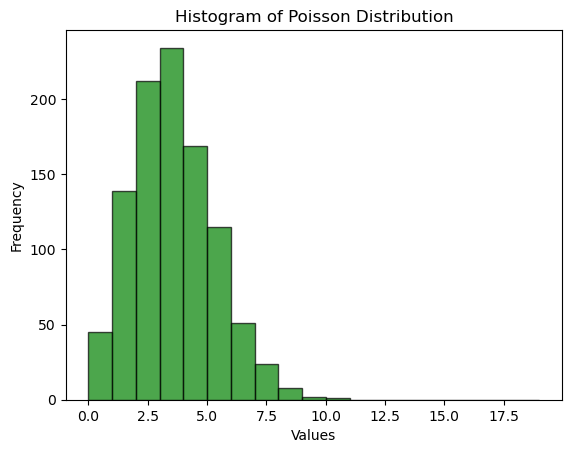

In [10]:
mean_poisson = 3
num_samples = 1000

random_numbers = np.random.poisson(mean_poisson, num_samples)

print("Generated random numbers:", random_numbers[:10])
bin_range=range(0,20)

plt.hist(random_numbers, bins=bin_range, color='green', alpha=0.7,edgecolor='black')
plt.title('Histogram of Poisson Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


b) Transform the generated Poisson numbers to their squares and create a histogram to visualize
the distribution of squared values.

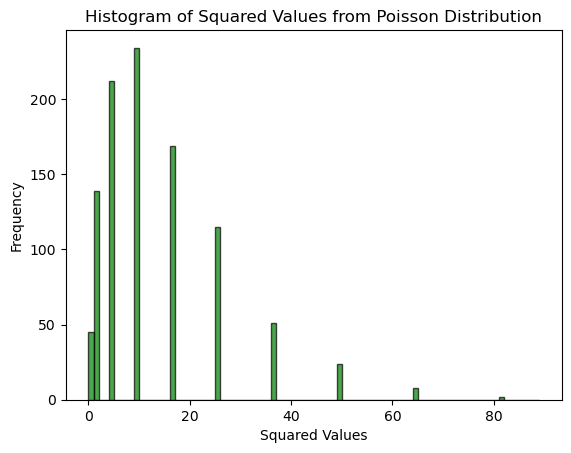

In [11]:

squared_numbers = []
for i in range(len(random_numbers)):
    square_number = random_numbers[i] ** 2
    squared_numbers.append(square_number)

bin_range=range(0,90)

plt.hist(squared_numbers, bins=bin_range, color='green', alpha=0.7,edgecolor= 'black')
plt.title('Histogram of Squared Values from Poisson Distribution')
plt.xlabel('Squared Values')
plt.ylabel('Frequency')
plt.show()


In [12]:
print(max(random_numbers))
print(max(squared_numbers))

10
100


c) Now, write a Python code to generate 100 pairs of random numbers from a bivariate Gaussian
distribution with means μ1 = 2, μ2 = 3 and covariance matrix Σ = [[1, 0.5], [0.5, 2]].

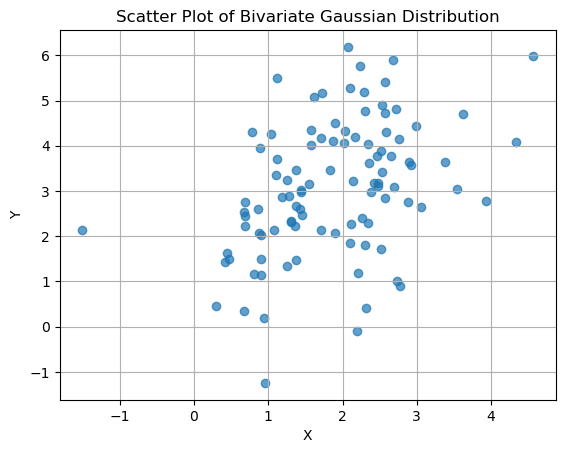

In [13]:
mean_vector = np.array([2, 3])
covariance_matrix = np.array([[1, 0.5], [0.5, 2]])
num_samples = 100

# Generate random numbers from a bivariate Gaussian distribution
random_numbers = generate_bivariate_normal(mean_vector, covariance_matrix, num_samples)

# Plot the scatter plot of the bivariate Gaussian distribution
plt.scatter(random_numbers[:, 0], random_numbers[:, 1], alpha=0.7)
plt.title('Scatter Plot of Bivariate Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

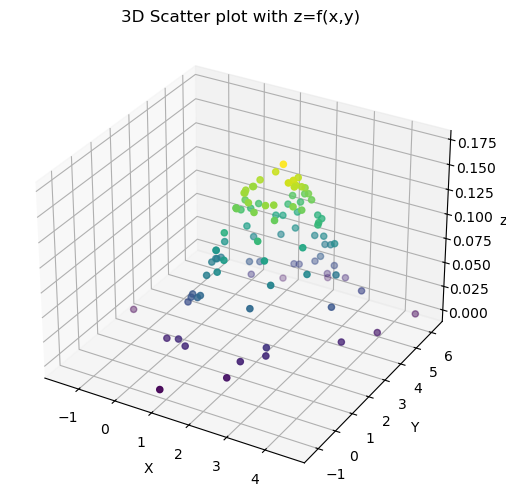

In [14]:
mue1=mean_vector[0]
mue2=mean_vector[1]
sigma1=covariance_matrix[0,0]**0.5
sigma2=covariance_matrix[1,1]**0.5
rho=covariance_matrix[0,1]/(sigma1*sigma2)

# z=pdf(x,y)
def q(x, y):
    z = 1 / (2 * np.pi * sigma1 * sigma2 * ((1 - rho) ** 2) ** 0.5) * \
        np.exp(-1 / (2 * (1 - rho ** 2)) * (((y - mue2) / sigma2) ** 2 + ((x - mue1) / sigma1) ** 2 - 2 * rho * ((x - mue1) / sigma1) * (y - mue2) / sigma2))
    return z

# Calculating Z 
z_values = q(random_numbers[:, 0], random_numbers[:, 1])


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(random_numbers[:, 0], random_numbers[:, 1], z_values, c=z_values, cmap='viridis')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("z")
ax.set_title("3D Scatter plot with z=f(x,y)")

plt.show()


In [15]:
print(max(random_numbers[:,0]))
print(max(random_numbers[:,1]))


4.56729859062259
6.1849533453290455


d) Transform each pair of Gaussian numbers to their squares (both elements of the pair) and create
a 3D scatter plot to visualize the distribution of squared values.

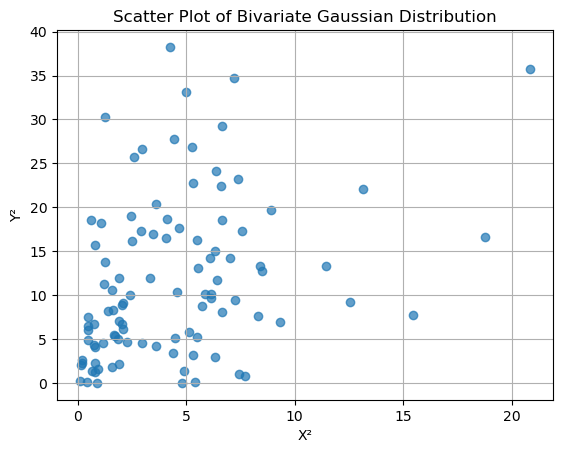

In [16]:
# Transform each pair to their squares
squared_data = random_numbers ** 2

# Plot the scatter plot of the bivariate Gaussian distribution
plt.scatter(squared_data[:, 0], squared_data[:, 1], alpha=0.7)
plt.title('Scatter Plot of Bivariate Gaussian Distribution')
plt.xlabel('X²')
plt.ylabel('Y²')
plt.grid(True)
plt.show()


In [17]:
mean_vector_transformed = np.mean(squared_data, axis=0)
covariance_matrix_transformed = np.cov(squared_data.T)

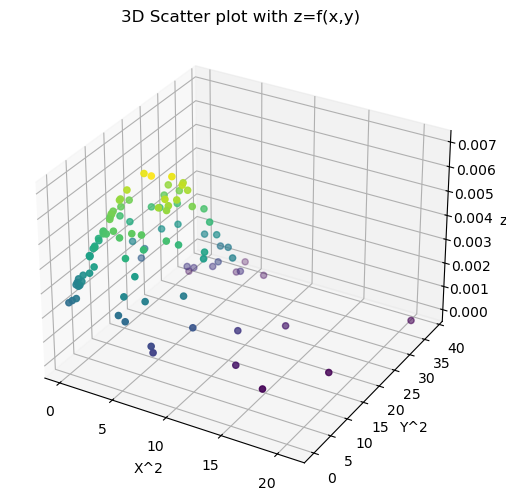

In [18]:
mue1=mean_vector_transformed [0]
mue2=mean_vector_transformed [1]
sigma1=covariance_matrix_transformed[0,0]**0.5
sigma2=covariance_matrix_transformed[1,1]**0.5
rho=covariance_matrix_transformed[0,1]/(sigma1*sigma2)

# z=pdf(x^2,y^2)
def q(x, y):
    z = 1 / (2 * np.pi * sigma1 * sigma2 * ((1 - rho) ** 2) ** 0.5) * \
        np.exp(-1 / (2 * (1 - rho ** 2)) * (((y - mue2) / sigma2) ** 2 + ((x - mue1) / sigma1) ** 2 - 2 * rho * ((x - mue1) / sigma1) * (y - mue2) / sigma2))
    return z

# Calculating Z for tranformed data
z_values = q(squared_data[:, 0], squared_data[:, 1])


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(squared_data[:, 0], squared_data[:, 1], z_values, c=z_values, cmap='viridis')

ax.set_xlabel("X^2")
ax.set_ylabel("Y^2")
ax.set_zlabel("z")
ax.set_title("3D Scatter plot with z=f(x,y)")

plt.show()


e) Compare the histograms from the Poisson distribution and the scatter plot from the multivariate
Gaussian distribution in terms of the shape and spread of the squared values.

f) Discuss any insights gained from the visualizations and transformations, considering the char-
acteristics of each distribution.

<p align='center'>***</p>